# Load Required Libraries 

In [93]:
%matplotlib inline
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns

In [69]:
# Create a Dataframe

fin_data = pd.read_csv('training.csv')

In [73]:
# Renaming Indices 
rename = {'[Q2]':    
{    1:'Male', 
    2:'Female'
},

'[Q3]': 
{   1:'Married',
    2:'Divorced',
    3:'Widowed',
    4:'Unmarried'
},

'[Q4]':
{   1:'No formal education',
    2:'Some primary',
    3:'Primary completed',
    4:'Post primary technical training',
    5:'Some secondary',
    6:'University or other higher education',
    7: 'Don’t know'
},

'[Q5]':
{   1:'Personally owns land',
    2:'Owns land with someone els',
    3:'Household member owns land',
    4:'land is rented',
    5:'Dont own land',
    6:'Dont know'
   
},            
            
'[Q6]':
{   1:'Yes',
    2:'No'
   
},

'Q7':
{   1:'Yes',
    2:'No'
       
},

'mobile_money_classification' :
{   0:'No mobile money or other financial service',
    1:'One other finacial service',
    2:'Mobile money only',
    3:'Mobile money and other financial service'
},
            
 'Mobile money usage':
{   -1:'not apllicable',
    1:'Yesterday/today',
    2:'In the past 7 days',
    3:'In the past 30 days',
    4:'In the past 90 days',
    5:' More than 90 days ago but less than 6 months ago',
    6:' 6 months or longer ago'
}
           }

fin_data.replace(rename, inplace=True)

In [70]:
#inspect data 

fin_data.head(5) #observe, get acquinted with ur data

,ID,Q1,Q2,Q3,Q4,Q5,Q6,Q7,Q8_1,Q8_2,...,Q17,Q18,Q19,Latitude,Longitude,mobile_money,savings,borrowing,insurance,mobile_money_classification
0,5086,98,2,3,1,1,2,2,0,0,...,-1,4,4,-4.460442,29.811396,0,0,0,0,0
1,1258,40,1,1,3,5,1,1,1,0,...,4,1,4,-6.176438,39.244871,1,1,1,0,3
2,331,18,2,4,6,3,2,1,0,0,...,-1,1,1,-6.825702,37.652798,1,0,0,0,2
3,6729,50,1,1,3,1,1,1,0,0,...,-1,1,4,-3.372049,35.808307,1,0,1,0,3
4,8671,34,1,1,1,1,2,1,0,1,...,-1,1,4,-7.179645,31.039095,1,1,0,1,3


# Examine the Dataset for any missing values


In [74]:
print(fin_data.isnull().values.any())

False


Examining the dataset using .isnull() returns False meaning all values are accounted for.



# Get Basic Descriptive Stats for the Dataset.

In [19]:
#.describe() gives the mean, std & IQR values
fin_data.describe()

,ID,Q1,Q2,Q3,Q4,Q5,Q6,Q7,Q8_1,Q8_2,...,Q17,Q18,Q19,Latitude,Longitude,mobile_money,savings,borrowing,insurance,mobile_money_classification
count,7094.000000,7094.000000,7094.000000,7094.000000,7094.000000,7094.000000,7094.000000,7094.000000,7094.000000,7094.000000,...,7094.000000,7094.000000,7094.000000,7094.000000,7094.000000,7094.000000,7094.000000,7094.000000,7094.000000,7094.000000
mean,4742.627291,38.239498,1.559910,1.787426,3.060051,2.548915,1.840569,1.397942,0.062165,0.630110,...,-0.431914,1.860164,3.163378,-6.034378,35.354029,0.553989,0.461517,0.432901,0.151255,1.799267
std,2731.120086,16.332148,0.496433,1.165160,1.557779,1.534257,0.366103,0.489508,0.241472,0.482809,...,1.489879,1.351372,1.317691,2.720888,2.899511,0.497112,0.498552,0.495512,0.358322,1.196955
min,1.000000,16.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,0.000000,0.000000,...,-1.000000,1.000000,1.000000,-11.467463,29.639578,0.000000,0.000000,0.000000,0.000000,0.000000
25%,2397.250000,25.000000,1.000000,1.000000,2.000000,1.000000,2.000000,1.000000,0.000000,0.000000,...,-1.000000,1.000000,2.000000,-8.275387,32.935429,0.000000,0.000000,0.000000,0.000000,1.000000
50%,4744.500000,35.000000,2.000000,1.000000,3.000000,3.000000,2.000000,1.000000,0.000000,1.000000,...,-1.000000,1.000000,4.000000,-6.087854,35.073326,1.000000,0.000000,0.000000,0.000000,2.000000
75%,7105.000000,48.000000,2.000000,3.000000,3.000000,4.000000,2.000000,2.000000,0.000000,1.000000,...,-1.000000,4.000000,4.000000,-3.517053,38.351815,1.000000,1.000000,1.000000,0.000000,3.000000
max,9459.000000,100.000000,2.000000,4.000000,8.000000,6.000000,2.000000,2.000000,1.000000,1.000000,...,5.000000,5.000000,5.000000,-1.084000,40.258744,1.000000,1.000000,1.000000,1.000000,3.000000


# Graphically Represent Relationship Between Financial Services Accessed and: 
# 1. age
# 2. gender
# 3. marital status
# 4. land ownership
# 5. type of income.


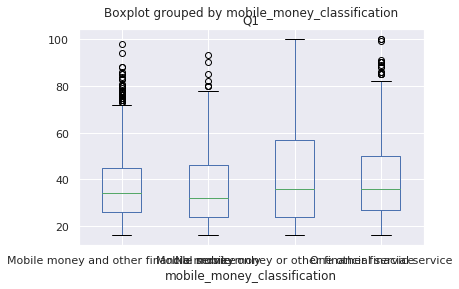

In [90]:
# 1.age
fin_data.boxplot(column=['Q1'], by='mobile_money_classification')
plt.show()

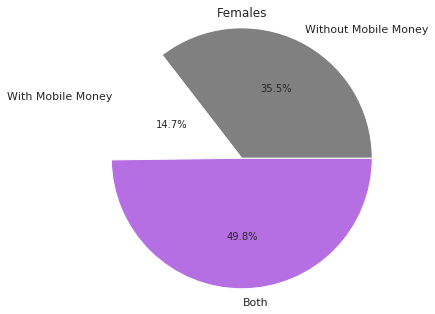

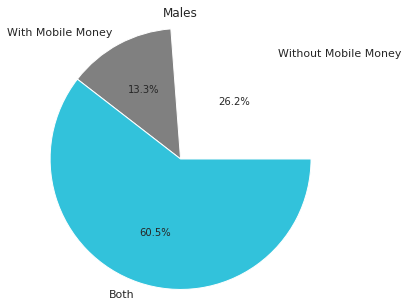

In [91]:
# 2.gender
females = fin_data[fin_data.Q2 == 2]

# f0 = len(females[females.mobile_money_classification == 0])
# f1 = len(females[females.mobile_money_classification == 1])
# f2 = len(females[females.mobile_money_classification == 2])
# f3 = len(females[females.mobile_money_classification == 3])
# f = f1 + f2 + f3 + f0 

males = fin_data[fin_data.Q2 == 1]

m0 = len(males[males.mobile_money_classification == 0])
m1 = len(males[males.mobile_money_classification == 1])
m2 = len(males[males.mobile_money_classification == 2]) 
m3 = len(males[males.mobile_money_classification == 3])
m = m1 + m2 + m3 + m0


# For females']
# Calculate piechart sizes
# f_without = f1 / f * 100
# f_with = f2/f * 100
# f_both = f3/f * 100

# Define the piechart
plt.figure(figsize=(10,5))
labels = ['Without Mobile Money','With Mobile Money','Both']
sizes = [f_without,f_with,f_both]
colors = ['grey', 'white','#b56fe3']


# Plot the pie chart
plt.pie(sizes, explode=None, colors=colors, labels=labels, radius = 1.2, autopct='%1.1f%%')
plt.title('Females')
plt.show()


# For males.loc[row_indexer,col_indexer] = value instead

# Calculate piechart sizes
# m_without = m1 / m * 100
# m_with = m2/m * 100
# m_both = m3/m * 100

# Define the piechart
plt.figure(figsize=(10,5))
labels = ['Without Mobile Money','With Mobile Money','Both']
sizes = [m_without, m_with,m_both]
colors = ['white', 'grey', '#32c2db']


# Plot the pie chart
plt.pie(sizes, explode=None, colors=colors, labels=labels, radius = 1.2, autopct='%1.1f%%')
plt.title('Males')     
plt.show()



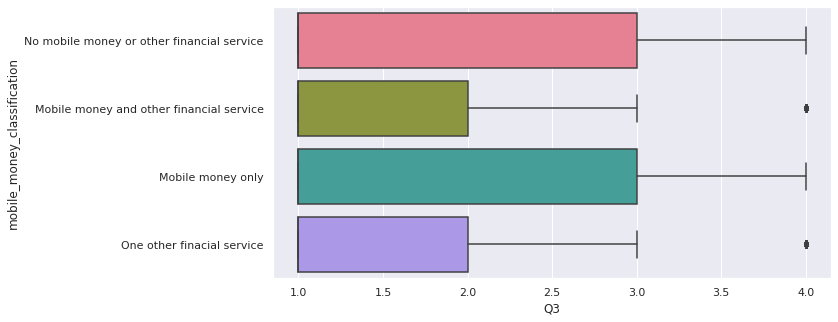

In [92]:
sns.set(rc={'figure.figsize': (10,5)})
sns.boxplot(x='Q3',y='mobile_money_classification', data=fin_data,palette='husl')
plt.show()

In [38]:
land_ownership = pd.crosstab(index=fin_data['mobile_money_classification'], columns=fin_data['Q6'])
land_ownership

Q6,1,2
mobile_money_classification,,
0,134,1252
1,245,1533
2,105,699
3,647,2479


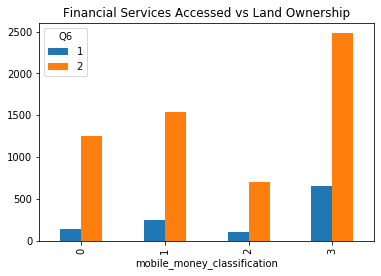

In [32]:
land_ownership.plot(kind='bar',stacked=0).set_title('Financial Services Accessed vs Land Ownership')
plt.show()

# Graphically Represent Relationship Between how often Mobile Services are used and:
## - age
## - gender
## - marital status
## - land ownership
## - type of income.

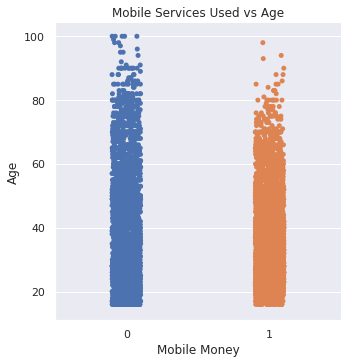

In [80]:
sns.catplot(x ="mobile_money", y="Q1", data=fin_data);
plt.xlabel("Mobile Money")
plt.ylabel("Age")
plt.title('Mobile Services Used vs Age')

plt.show()

In [60]:
gender = pd.crosstab(index=fin_data['mobile_money'], columns=fin_data['Q2'])
gender

Q2,1,2
mobile_money,,
0,1163,2001
1,1959,1971


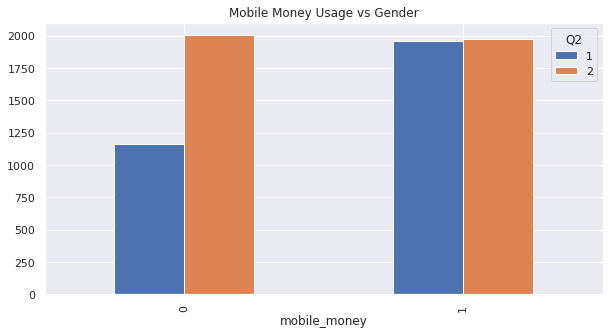

In [84]:
gender.plot(kind='bar',stacked=0).set_title('Mobile Money Usage vs Gender')
plt.show()

In [80]:
marital_status = pd.crosstab(index=fin_data['mobile_money'], columns=fin_data['Q3'])
marital_status

Q3,1,2,3,4
mobile_money,,,,
0,1998,304,420,442
1,2550,383,258,739


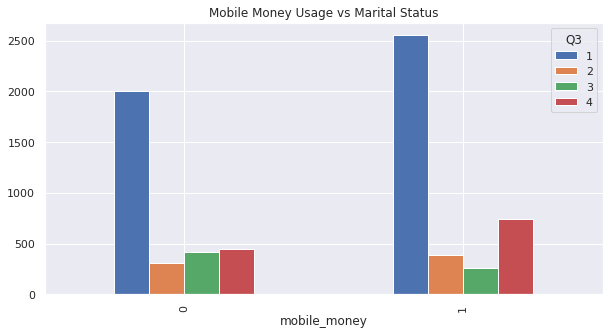

In [81]:
marital_status.plot(kind='bar',stacked=0).set_title('Mobile Money Usage vs Marital Status')
plt.show()

In [84]:
land_ownership = pd.crosstab(index=fin_data['mobile_money'], columns=fin_data['Q5'])
land_ownership

Q5,1,2,3,4,5,6
mobile_money,,,,,,
0,1457,210,865,173,456,3
1,1545,195,864,542,779,5


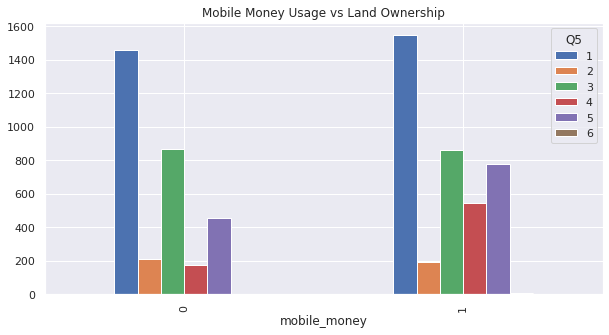

In [85]:
land_ownership.plot(kind='bar',stacked=0).set_title('Mobile Money Usage vs Land Ownership')
plt.show()

In [85]:
import sys
!{sys.executable} -m pip install folium --user
import folium
from folium.plugins import MarkerCluster

  Using cached https://files.pythonhosted.org/packages/fd/a0/ccb3094026649cda4acd55bf2c3822bb8c277eb11446d13d384e5be35257/folium-0.10.1-py2.py3-none-any.whl
  Using cached https://files.pythonhosted.org/packages/63/36/1c93318e9653f4e414a2e0c3b98fc898b4970e939afeedeee6075dd3b703/branca-0.3.1-py3-none-any.whl
